In [46]:
import pandas as pd
from datetime import datetime, timedelta

In [39]:
df_berlin = pd.read_csv('processed/berlin_cleaned.csv')

In [3]:
df_berlin

,day,weather_code,humidity,temperature,feels_like,rain,snowfall,sunshine_hours,daylight_hours,month_year,year,month_num,season,day_of_week,weather_description
0,2015-07-15,3,71,18.3,17.6,0.0,0.0,11.526564,16.363972,2015-07,2015,7,summer,Wednesday,Cloudy
1,2015-07-16,51,67,20.3,20.5,0.1,0.0,12.943117,16.325992,2015-07,2015,7,summer,Thursday,Light Drizzle
2,2015-07-17,3,67,23.1,24.1,0.0,0.0,14.145764,16.286950,2015-07,2015,7,summer,Friday,Cloudy
3,2015-07-18,51,67,22.7,23.2,0.3,0.0,14.633294,16.246900,2015-07,2015,7,summer,Saturday,Light Drizzle
4,2015-07-19,63,80,18.7,18.9,11.3,0.0,7.333481,16.205839,2015-07,2015,7,summer,Sunday,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2025-06-11,51,67,15.8,13.3,1.1,0.0,13.343106,16.756864,2025-06,2025,6,summer,Wednesday,Light Drizzle
3620,2025-06-12,1,58,16.6,15.2,0.0,0.0,15.379931,16.773250,2025-06,2025,6,summer,Thursday,Mainly Sunny
3621,2025-06-13,3,42,18.7,15.9,0.0,0.0,15.390986,16.787853,2025-06,2025,6,summer,Friday,Cloudy
3622,2025-06-14,0,42,23.0,21.0,0.0,0.0,15.412967,16.800631,2025-06,2025,6,summer,Saturday,Sunny


In [4]:
df_brooklyn = pd.read_csv('processed/brooklyn_cleaned.csv')

In [5]:
# add rolling averages to files for visualisations 

# df_berlin['rain_7d_avg'] = df_berlin['rain'].rolling(window=7).mean()
# df_berlin['sunshine_hours_7d_avg'] = df_berlin['sunshine_hours'].rolling(window=7).mean()
# df_berlin['snowfall_7d_avg'] = df_berlin['snowfall'].rolling(window=7).mean()
# df_berlin['rain_30d_avg'] = df_berlin['rain'].rolling(window=30).mean()
# df_berlin['sunshine_30d_avg'] = df_berlin['sunshine_hours'].rolling(window=30).mean()
# df_berlin['snowfall_30d_avg'] = df_berlin['snowfall'].rolling(window=30).mean()

In [6]:
# df_brooklyn['rain_7d_avg'] = df_brooklyn['rain'].rolling(window=7).mean()
# df_brooklyn['sunshine_7d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=7).mean()
# df_brooklyn['snowfall_7d_avg'] = df_brooklyn['snowfall'].rolling(window=7).mean()
# df_brooklyn['rain_30d_avg'] = df_brooklyn['rain'].rolling(window=30).mean()
# df_brooklyn['sunshine_30d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=30).mean()
# df_brooklyn['snowfall_30d_avg'] = df_brooklyn['snowfall'].rolling(window=30).mean()

In [7]:
season_berlin = df_berlin.groupby('season')['temperature'].mean()

In [8]:
season_berlin.to_frame()

,temperature
season,
autumn,11.086264
spring,9.816522
summer,20.114254
winter,2.747176


In [9]:
season_brooklyn = df_brooklyn.groupby('season')['temperature'].mean()

In [10]:
df_brooklyn.groupby('season')['sunshine_hours'].mean()

season
autumn     8.456642
spring     9.269853
summer    12.295395
winter     6.597962
Name: sunshine_hours, dtype: float64

In [11]:
df_berlin.groupby('season')['sunshine_hours'].mean()

season
autumn     6.026350
spring     9.126760
summer    11.412396
winter     3.249650
Name: sunshine_hours, dtype: float64

In [12]:
df_berlin[df_berlin['sunshine_hours'] < 1]['sunshine_hours'].shape

(547,)

In [13]:
df_brooklyn[df_brooklyn['sunshine_hours'] < 1]['sunshine_hours'].shape

(183,)

In [14]:
sun_berlin = df_berlin[df_berlin['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [15]:
sun_brooklyn = df_brooklyn[df_brooklyn['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [16]:
sun_brooklyn

,0
month_year,
2015-07,17
2015-08,31
2015-09,30
2015-10,29
2015-11,28
...,...
2025-02,27
2025-03,28
2025-04,27


In [17]:
sun_merged = pd.merge(sun_berlin, sun_brooklyn, on='month_year', suffixes=('_berlin', '_brooklyn'))

<Axes: xlabel='month_year'>

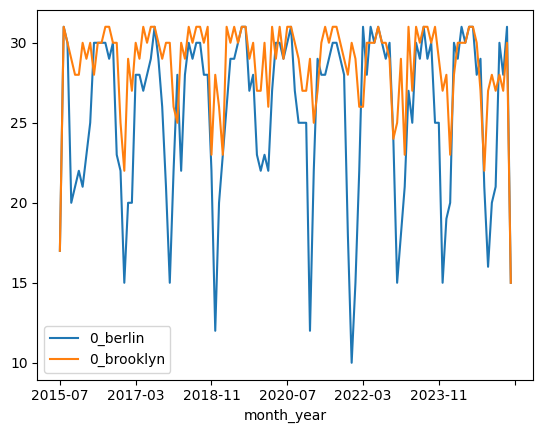

In [18]:
sun_merged.plot()

In [19]:
sun_merged.to_csv('processed/sun_hours.csv')

In [20]:
rain_brooklyn = df_brooklyn[df_brooklyn['rain'] >= 1].groupby('month_year').size().to_frame()
rain_berlin = df_berlin[df_berlin['rain'] >= 1].groupby('month_year').size().to_frame()
rain_merged = pd.merge(rain_berlin, rain_brooklyn, on='month_year', suffixes=('Berlin', 'Brooklyn'))

<Axes: xlabel='month_year'>

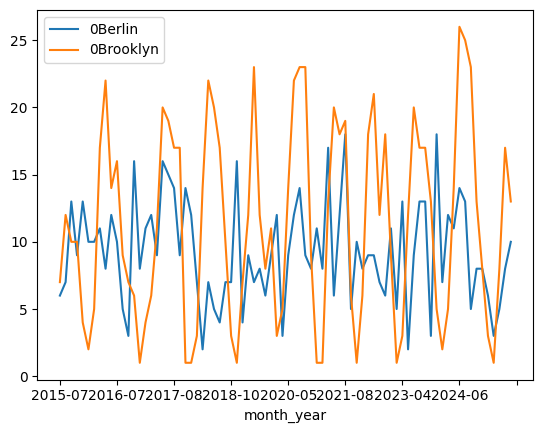

In [21]:
rain_merged.plot()

In [22]:
rain_merged.to_csv('processed/rain_hours.csv')

In [23]:
df_berlin.groupby('year')['rain'].sum()

year
2015    306.2
2016    490.7
2017    798.1
2018    381.5
2019    508.0
2020    531.4
2021    574.0
2022    472.1
2023    777.8
2024    628.8
2025    152.0
Name: rain, dtype: float64

<Axes: title={'center': 'Rain Sum per year Brooklyn'}, ylabel='year'>

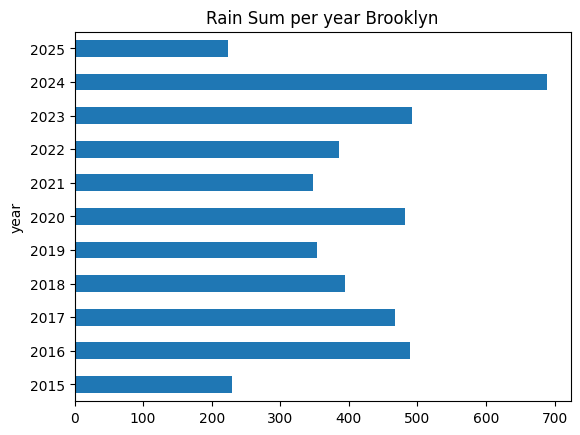

In [24]:
df_brooklyn.groupby('year')['rain'].sum().plot(kind='barh', title='Rain Sum per year Brooklyn')

<Axes: title={'center': 'Rain Sum per year Berlin'}, ylabel='year'>

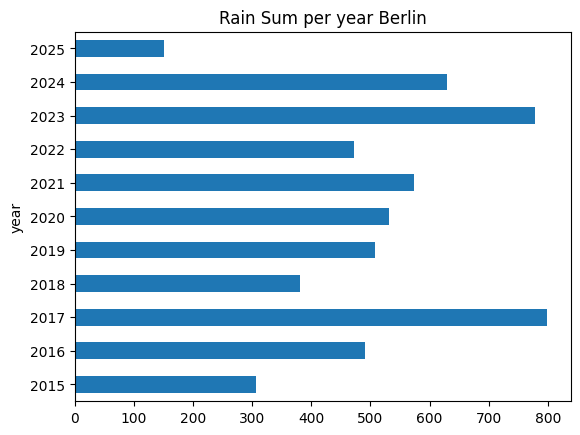

In [25]:
df_berlin.groupby('year')['rain'].sum().plot(kind='barh', title='Rain Sum per year Berlin')

In [26]:
df_berlin.groupby('year')['rain'].sum().to_frame()

,rain
year,
2015,306.2
2016,490.7
2017,798.1
2018,381.5
2019,508.0
2020,531.4
2021,574.0
2022,472.1
2023,777.8


In [27]:
combined = pd.concat([(df_berlin.groupby('year')['rain'].sum().to_frame().add_suffix('_berlin')),(df_brooklyn.groupby('year')['rain'].sum().to_frame().add_suffix('_nyc'))], axis=1)
combined.to_csv('rain_sum_year.csv') 

In [28]:
merged = pd.merge(df_berlin, df_brooklyn, on='day', suffixes=('_berlin', '_brooklyn'))

In [29]:
merged = merged.drop(['month_year_berlin', 'year_berlin', 'month_num_berlin', 'season_berlin'], axis=1)

In [30]:
(
    merged
    .rename(
        columns={
            'month_num_brooklyn' : 'month_num', 
            'season_brooklyn' : 'season', 
            'year_brooklyn' : 'year'
        },
        inplace=True
    )
)
            

In [40]:
merged

,day,weather_code_berlin,humidity_berlin,temperature_berlin,feels_like_berlin,rain_berlin,snowfall_berlin,sunshine_hours_berlin,daylight_hours_berlin,day_of_week_berlin,...,rain_brooklyn,snowfall_brooklyn,sunshine_hours_brooklyn,daylight_hours_brooklyn,month_year_brooklyn,year,month_num,season,day_of_week_brooklyn,weather_description_brooklyn
0,2015-07-15,3,71,18.3,17.6,0.0,0.0,11.526564,16.363972,Wednesday,...,0.0,0.0,13.732267,14.803808,2015-07,2015,7,summer,Wednesday,Mainly Sunny
1,2015-07-16,51,67,20.3,20.5,0.1,0.0,12.943117,16.325992,Thursday,...,0.0,0.0,13.720197,14.781047,2015-07,2015,7,summer,Thursday,Partly Cloudy
2,2015-07-17,3,67,23.1,24.1,0.0,0.0,14.145764,16.286950,Friday,...,2.8,0.0,13.204861,14.757614,2015-07,2015,7,summer,Friday,Light Rain
3,2015-07-18,51,67,22.7,23.2,0.3,0.0,14.633294,16.246900,Saturday,...,3.4,0.0,11.730808,14.733536,2015-07,2015,7,summer,Saturday,Light Rain
4,2015-07-19,63,80,18.7,18.9,11.3,0.0,7.333481,16.205839,Sunday,...,3.3,0.0,10.386319,14.708764,2015-07,2015,7,summer,Sunday,Drizzle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2025-06-11,51,67,15.8,13.3,1.1,0.0,13.343106,16.756864,Wednesday,...,1.4,0.0,8.462950,15.042731,2025-06,2025,6,summer,Wednesday,Light Drizzle
3620,2025-06-12,1,58,16.6,15.2,0.0,0.0,15.379931,16.773250,Thursday,...,14.3,0.0,5.434453,15.051983,2025-06,2025,6,summer,Thursday,Rain
3621,2025-06-13,3,42,18.7,15.9,0.0,0.0,15.390986,16.787853,Friday,...,3.1,0.0,13.000000,15.060189,2025-06,2025,6,summer,Friday,Drizzle
3622,2025-06-14,0,42,23.0,21.0,0.0,0.0,15.412967,16.800631,Saturday,...,4.5,0.0,2.812447,15.067328,2025-06,2025,6,summer,Saturday,Drizzle


<Axes: xlabel='day', ylabel='[temperature_brooklyn]'>

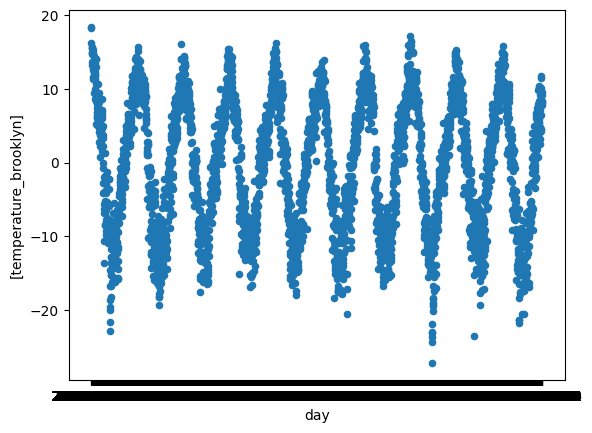

In [32]:
merged.plot(x='day', y=['temperature_brooklyn'], kind='scatter')

In [34]:
# get days with sun

In [43]:
merged['sunny_flag_brooklyn'] = merged['weather_description_brooklyn'].isin(['Sunny', 'Mainly sunny'])

In [45]:
merged['sunny_flag_berlin'] = merged['weather_description_berlin'].isin(['Sunny', 'Mainly sunny'])

In [64]:
twelve_months_ago = datetime.now() - timedelta(days=365)

In [50]:
merged.dtypes

day                              object
weather_code_berlin               int64
humidity_berlin                   int64
temperature_berlin              float64
feels_like_berlin               float64
rain_berlin                     float64
snowfall_berlin                 float64
sunshine_hours_berlin           float64
daylight_hours_berlin           float64
day_of_week_berlin               object
weather_description_berlin       object
weather_code_brooklyn             int64
humidity_brooklyn                 int64
temperature_brooklyn            float64
feels_like_brooklyn             float64
rain_brooklyn                   float64
snowfall_brooklyn               float64
sunshine_hours_brooklyn         float64
daylight_hours_brooklyn         float64
month_year_brooklyn              object
year                              int64
month_num                         int64
season                           object
day_of_week_brooklyn             object
weather_description_brooklyn     object


In [62]:
merged['day'] = pd.to_datetime(merged['day'])

In [65]:
recent = merged[merged['day'] >= twelve_months_ago]

In [68]:
recent[['day', 'sunny_flag_brooklyn','weather_description_brooklyn', 'sunny_flag_berlin', 'weather_description_berlin']].to_csv('processed/sunny_days.csv')

In [90]:
merged.columns

Index(['day', 'weather_code_berlin', 'humidity_berlin', 'temperature_berlin',
       'feels_like_berlin', 'rain_berlin', 'snowfall_berlin',
       'sunshine_hours_berlin', 'daylight_hours_berlin', 'day_of_week_berlin',
       'weather_description_berlin', 'weather_code_brooklyn',
       'humidity_brooklyn', 'temperature_brooklyn', 'feels_like_brooklyn',
       'rain_brooklyn', 'snowfall_brooklyn', 'sunshine_hours_brooklyn',
       'daylight_hours_brooklyn', 'month_year_brooklyn', 'year', 'month_num',
       'season', 'day_of_week_brooklyn', 'weather_description_brooklyn',
       'sunny_flag_brooklyn', 'sunny_flag_berlin', 'sunny_berlin',
       'sunny_brooklyn', 'sun_ratio_berlin', 'sun_ratio_brooklyn',
       'is_very_sunny_berlin', 'is_very_sunny_brooklyn'],
      dtype='object')

In [78]:
merged['sun_ratio_berlin'] = merged['sunshine_hours_berlin'] / merged['daylight_hours_berlin']

In [85]:
merged['sun_ratio_brooklyn'] = merged['sunshine_hours_brooklyn'] / merged['daylight_hours_brooklyn']

In [86]:
merged['is_very_sunny_berlin'] = merged['sun_ratio_berlin'] >= 0.8

In [87]:
merged['is_very_sunny_brooklyn'] = merged['sun_ratio_brooklyn'] >= 0.8

In [88]:
recent = merged[merged['day'] >= twelve_months_ago]
recent

,day,weather_code_berlin,humidity_berlin,temperature_berlin,feels_like_berlin,rain_berlin,snowfall_berlin,sunshine_hours_berlin,daylight_hours_berlin,day_of_week_berlin,...,day_of_week_brooklyn,weather_description_brooklyn,sunny_flag_brooklyn,sunny_flag_berlin,sunny_berlin,sunny_brooklyn,sun_ratio_berlin,sun_ratio_brooklyn,is_very_sunny_berlin,is_very_sunny_brooklyn
3263,2024-06-20,3,69,16.8,16.2,0.0,0.0,14.535958,16.840067,Thursday,...,Thursday,Light Rain,False,False,0.863177,0.883023,0.863177,0.883023,True,True
3264,2024-06-21,63,75,20.6,21.3,5.5,0.0,8.260297,16.840042,Friday,...,Friday,Rain,False,False,0.490515,0.433539,0.490515,0.433539,False,False
3265,2024-06-22,55,77,19.1,18.3,3.6,0.0,9.547408,16.838128,Saturday,...,Saturday,Rain,False,False,0.567011,0.783996,0.567011,0.783996,False,False
3266,2024-06-23,3,70,18.3,16.9,0.0,0.0,12.007633,16.834344,Sunday,...,Sunday,Rain,False,False,0.713282,0.645877,0.713282,0.645877,False,False
3267,2024-06-24,51,71,18.6,18.6,0.1,0.0,15.222378,16.828717,Monday,...,Monday,Rain,False,False,0.904548,0.635152,0.904548,0.635152,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2025-06-11,51,67,15.8,13.3,1.1,0.0,13.343106,16.756864,Wednesday,...,Wednesday,Light Drizzle,False,False,0.796277,0.562594,0.796277,0.562594,False,False
3620,2025-06-12,1,58,16.6,15.2,0.0,0.0,15.379931,16.773250,Thursday,...,Thursday,Rain,False,False,0.916932,0.361046,0.916932,0.361046,True,False
3621,2025-06-13,3,42,18.7,15.9,0.0,0.0,15.390986,16.787853,Friday,...,Friday,Drizzle,False,False,0.916793,0.863203,0.916793,0.863203,True,True
3622,2025-06-14,0,42,23.0,21.0,0.0,0.0,15.412967,16.800631,Saturday,...,Saturday,Drizzle,False,True,0.917404,0.186659,0.917404,0.186659,True,False


In [89]:
recent[['day', 'is_very_sunny_brooklyn','is_very_sunny_berlin']].to_csv('processed/sunny_ratio.csv')

In [91]:
merged.to

,day,weather_code_berlin,humidity_berlin,temperature_berlin,feels_like_berlin,rain_berlin,snowfall_berlin,sunshine_hours_berlin,daylight_hours_berlin,day_of_week_berlin,...,day_of_week_brooklyn,weather_description_brooklyn,sunny_flag_brooklyn,sunny_flag_berlin,sunny_berlin,sunny_brooklyn,sun_ratio_berlin,sun_ratio_brooklyn,is_very_sunny_berlin,is_very_sunny_brooklyn
0,2015-07-15,3,71,18.3,17.6,0.0,0.0,11.526564,16.363972,Wednesday,...,Wednesday,Mainly Sunny,False,False,0.704387,0.927617,0.704387,0.927617,False,True
1,2015-07-16,51,67,20.3,20.5,0.1,0.0,12.943117,16.325992,Thursday,...,Thursday,Partly Cloudy,False,False,0.792792,0.928229,0.792792,0.928229,False,True
2,2015-07-17,3,67,23.1,24.1,0.0,0.0,14.145764,16.286950,Friday,...,Friday,Light Rain,False,False,0.868534,0.894783,0.868534,0.894783,True,True
3,2015-07-18,51,67,22.7,23.2,0.3,0.0,14.633294,16.246900,Saturday,...,Saturday,Light Rain,False,False,0.900682,0.796198,0.900682,0.796198,True,False
4,2015-07-19,63,80,18.7,18.9,11.3,0.0,7.333481,16.205839,Sunday,...,Sunday,Drizzle,False,False,0.452521,0.706131,0.452521,0.706131,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2025-06-11,51,67,15.8,13.3,1.1,0.0,13.343106,16.756864,Wednesday,...,Wednesday,Light Drizzle,False,False,0.796277,0.562594,0.796277,0.562594,False,False
3620,2025-06-12,1,58,16.6,15.2,0.0,0.0,15.379931,16.773250,Thursday,...,Thursday,Rain,False,False,0.916932,0.361046,0.916932,0.361046,True,False
3621,2025-06-13,3,42,18.7,15.9,0.0,0.0,15.390986,16.787853,Friday,...,Friday,Drizzle,False,False,0.916793,0.863203,0.916793,0.863203,True,True
3622,2025-06-14,0,42,23.0,21.0,0.0,0.0,15.412967,16.800631,Saturday,...,Saturday,Drizzle,False,True,0.917404,0.186659,0.917404,0.186659,True,False


In [92]:
merged.to_csv('processed/weather_fulldata.csv')